**ML KNN ALGORITHM**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
data_files=['Amazon','AMD','Apple','Cisco','Meta','Microsoft','Netflix','Qualcomm','Starbucks','Tesla']

In [55]:
data=[]

for i in data_files:
    temp=pd.read_csv('Dataset/{}.csv'.format(i),parse_dates=True,index_col=0,usecols=['Date','Close/Last'])
    temp.sort_index(ascending=True,inplace=True)
    temp.rename(columns={'Close/Last':"Close"},inplace=True)
    temp.name=i
    data.append(temp)

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn import neighbors

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [58]:
for i in data:
  print(i.name)
  print(i.describe())

Amazon
             Close
count  2517.000000
mean     73.078899
std      53.593875
min      12.260000
25%      21.500000
50%      57.620000
75%     107.780000
max     186.570000
AMD
             Close
count  2517.000000
mean     32.566853
std      38.117694
min       1.620000
25%       3.730000
50%      12.860000
75%      54.230000
max     161.910000
Apple
             Close
count  2517.000000
mean     61.295606
std      48.305058
min      13.950000
25%      26.690000
50%      40.240000
75%      81.220000
max     182.010000
Cisco
             Close
count  2517.000000
mean     37.367680
std      11.524952
min      18.830000
25%      27.220000
50%      35.710000
75%      46.590000
max      63.960000
Meta
             Close
count  2517.000000
mean    154.774970
std      84.724854
min      22.900000
25%      82.510000
50%     151.380000
75%     194.470000
max     382.180000
Microsoft
             Close
count  2517.000000
mean    119.770699
std      89.500168
min      26.370000
25%      46.

In [61]:
def KNNreg(df):
    test=30
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_7'] = df['Close'].shift(7)
    df['Lag_2'] = df['Close'].shift(2)
    df['Lag_3'] = df['Close'].shift(3)
    df['Lag_4'] = df['Close'].shift(4)
    df['Lag_5'] = df['Close'].shift(5)
    df['Lag_6'] = df['Close'].shift(6)
    df['Lag_7'] = df['Close'].shift(7)
    df.dropna(inplace=True)

    Xtrain=np.array(df.iloc[:-test,1: ])
    Xtest=np.array(df.iloc[-test:,1:])
    Ytrain=df.iloc[:-test,0 ]
    Ytest=df.iloc[-test:,0 ] 
    
    parameters = {"n_neighbors": range(1, 50)}
    gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
    gridsearch.fit(Xtrain, Ytrain) 
    
    print(gridsearch.best_params_['n_neighbors'])

    model = KNeighborsRegressor(n_neighbors=gridsearch.best_params_['n_neighbors'])
    model.fit(Xtrain,Ytrain)

    result=model.predict(Xtest)
    
    plt.plot(Ytest.values,label='actual')
    plt.plot(result,label='predicted')
    plt.legend(loc='best')
    plt.show()
    
    #one-step forecast
    step=np.array(Ytest[-7:].values[::-1])
    forecast=model.predict(pd.DataFrame(step).T)
    
    return mean_squared_error(result,Ytest),mean_absolute_percentage_error(result,Ytest),forecast[0]

7


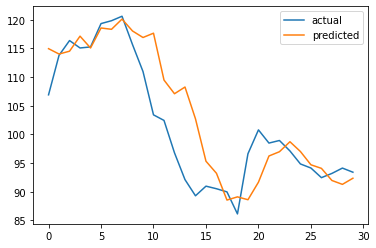

24


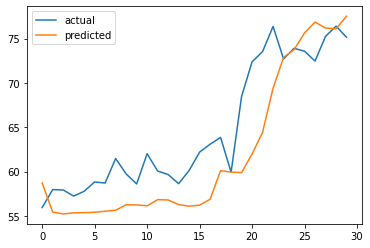

5


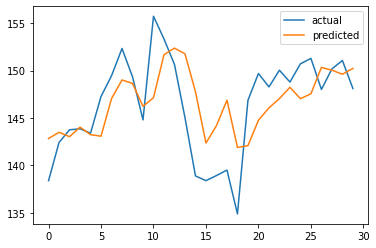

13


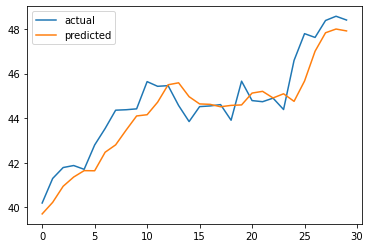

12


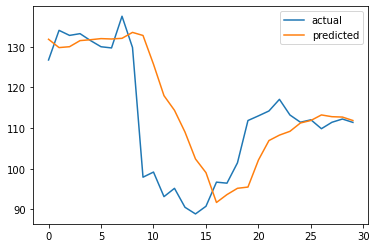

7


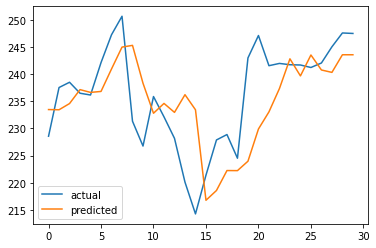

25


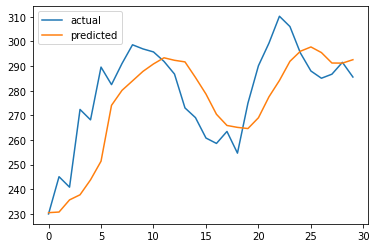

8


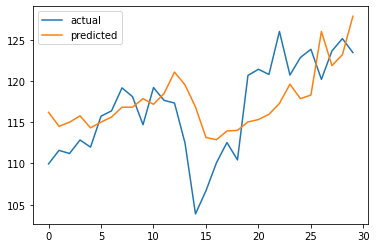

1


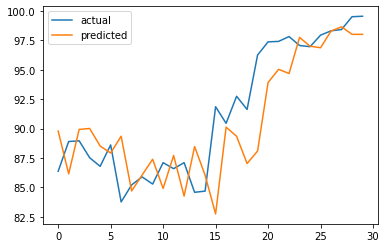

14


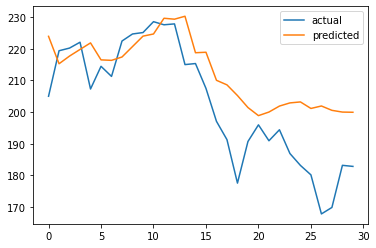

In [62]:
mse_errors=[]
mape_errors=[]
forecast=[]

for i in data:
    mse,mape,f=KNNreg(i.copy())
    mse_errors.append(mse)
    mape_errors.append(mape)
    forecast.append(f)

In [63]:
df=pd.DataFrame({"mse":mse_errors,"mape":mape_errors,"one-step forecast":forecast},index=data_files)

In [64]:
df

,mse,mape,one-step forecast
Amazon,37.645840,0.041255,94.181429
AMD,20.372318,0.061313,76.954583
Apple,17.029862,0.022520,150.450000
Cisco,0.823653,0.016705,48.160000
Meta,140.626277,0.070396,112.347500
Microsoft,70.921567,0.027729,245.735714
Netflix,246.371372,0.046724,290.989600
Qualcomm,22.720673,0.033579,125.982500
Starbucks,10.449370,0.026904,98.020000
Tesla,210.803692,0.054612,198.866429
